In [2]:
from sklearn.metrics import r2_score
print (r2_score([10, 11, 12], [9, 11, 12.1]))

0.495


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Заменяем признак пола на числовые значения:

In [6]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

Выделяем признаки:

In [7]:
x_labels = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']

Выделяем целевую переменную:

In [9]:
x,y = df[x_labels], df['Rings']

Обучаем случайный лес:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=1)#кросс-валидация
scores=[]


for n in range(1, 51):
    clf = RandomForestRegressor(n_estimators=n, random_state=1)#модель
    score = np.mean(cross_val_score(clf, x, y, cv=kf, scoring='r2'))
    print (n, score)
    scores.append(score)
    

    

1 0.10213869487724367
2 0.33841675515802144
3 0.4035798494618691
4 0.44272239896668103
5 0.4640207660674969
6 0.4705816327587792
7 0.4758306163523006
8 0.4817418456255852
9 0.4883478130215681
10 0.49446412480247826
11 0.4933965550001963
12 0.4979658763976154
13 0.5021364605722853
14 0.5064286962257328
15 0.5083311970432101
16 0.5105131438322147
17 0.5138482947993028
18 0.5163275412739493
19 0.519034688136388
20 0.5186735928723822
21 0.5198354233542501
22 0.5201583536722211
23 0.5210172709366251
24 0.5224031825808091
25 0.5226174639676071


Минимальное кол-во деревьев, при котором показатель на кросс-валидации больше 0.52:

In [38]:
for n, score in enumerate(scores):
    if score > 0.52:
        print(1, n)
        

1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50


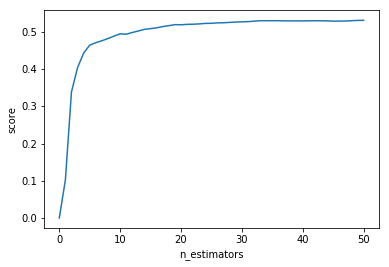

In [37]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.savefig('score.png')

Увеличиваем кол-во деревьев - растет качество